# <center> STOCK MARKET PREDICTION USING LSTM </center>

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

2024-01-31 10:58:45.732667: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 10:58:45.732888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 10:58:45.934053: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Reading CSV file

In [38]:
df=pd.read_csv('dataset.csv',index_col='Date')
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


## Splitting Dataset into train and test set

In [51]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Close'],axis='columns'),df['Close'],test_size=20)

## Normalizing splitted datasets

In [52]:
xs=MinMaxScaler()
x_scaled=xs.fit_transform(x_train)
x_train[x_train.columns]=x_scaled

xts=MinMaxScaler()
x_scaled=xts.fit_transform(x_test)
x_test[x_test.columns]=x_scaled

y_train=pd.DataFrame(y_train)
ys=MinMaxScaler()
y_scaled=ys.fit_transform(y_train)
y_train['Close']=y_scaled

y_test=pd.DataFrame(y_test)
yts=MinMaxScaler()
y_scaled=yts.fit_transform(y_test)
y_test['Close']=y_scaled

## Sorting the splitted data (ordered by Date)

In [53]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
x_train=x_train.sort_index()
x_test=x_test.sort_index()
y_train=y_train.sort_index()
y_test=y_test.sort_index()

## Creating a Network using LSTM layers

In [9]:
model=Sequential()
model.add(layers.LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(50))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics='accuracy')

## Model Summary

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 6, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 6, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

## Fitting the train set in our model

In [44]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 15ms/step - loss: 5.2370e-04 - accuracy: 9.9256e-04
Epoch 2/50
63/63 [==============================] - 1s 15ms/step - loss: 5.2900e-04 - accuracy: 9.9256e-04
Epoch 3/50
63/63 [==============================] - 1s 16ms/step - loss: 5.0339e-04 - accuracy: 9.9256e-04
Epoch 4/50
63/63 [==============================] - 1s 16ms/step - loss: 4.1813e-04 - accuracy: 9.9256e-04
Epoch 5/50
63/63 [==============================] - 1s 16ms/step - loss: 4.5440e-04 - accuracy: 9.9256e-04
Epoch 6/50
63/63 [==============================] - 1s 16ms/step - loss: 4.9067e-04 - accuracy: 9.9256e-04
Epoch 7/50
63/63 [==============================] - 1s 15ms/step - loss: 4.2999e-04 - accuracy: 9.9256e-04
Epoch 8/50
63/63 [==============================] - 1s 15ms/step - loss: 4.3632e-04 - accuracy: 9.9256e-04
Epoch 9/50
63/63 [==============================] - 1s 16ms/step - loss: 5.1696e-04 - accuracy: 9.9256e-04
Epoch 10/50
63/63 [==================

## Converting the normalized test dataset to it's original form

In [56]:
x_test[x_test.columns]=xts.inverse_transform(x_test)
x_test

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,
2010-11-03,126.00,126.70,124.00,124.30,602987.0,754.43
2010-11-22,120.60,120.60,117.00,119.00,829435.0,987.14
2011-10-05,83.50,83.70,80.50,81.10,585464.0,479.96
2012-01-11,94.65,95.40,92.45,92.95,651931.0,611.59
2013-03-08,132.10,135.00,131.20,134.05,3047021.0,4072.47
2013-04-10,130.85,131.80,128.50,130.90,1396238.0,1817.54
2014-02-03,140.85,142.95,140.00,140.50,2140205.0,3023.42
2015-04-20,157.30,157.75,151.20,152.90,1753170.0,2696.67
2015-06-29,132.00,132.00,128.20,129.60,1397938.0,1809.60


In [55]:
y_test['Close']=yts.inverse_transform(y_test)
y_test

,Close
Date,
2010-11-03,124.55
2010-11-22,119.90
2011-10-05,81.10
2012-01-11,92.90
2013-03-08,134.10
2013-04-10,131.00
2014-02-03,140.70
2015-04-20,153.25
2015-06-29,129.55


## Making predictions of y test

In [54]:
y_pred=pd.DataFrame(model.predict(x_test),index=y_test.index,columns=['Closed'])
y_pred['Closed']=yts.inverse_transform(y_pred)
y_pred

1/1 [==============================] - 0s 29ms/step


,Closed
Date,
2010-11-03,124.321541
2010-11-22,119.321671
2011-10-05,84.198997
2012-01-11,95.049713
2013-03-08,139.253860
2013-04-10,131.525818
2014-02-03,144.074707
2015-04-20,156.494568
2015-06-29,131.696014


## Concatinating the two dataframes to compare the values

In [57]:
y_test_pred=pd.concat((y_test,y_pred),axis='columns')
y_test_pred['y_test']=y_test_pred['Close']
y_test_pred['y_pred']=y_test_pred['Closed']
y_test_pred.drop(columns=['Close','Closed'],inplace=True)
y_test_pred

,y_test,y_pred
Date,,
2010-11-03,124.55,124.321541
2010-11-22,119.90,119.321671
2011-10-05,81.10,84.198997
2012-01-11,92.90,95.049713
2013-03-08,134.10,139.253860
2013-04-10,131.00,131.525818
2014-02-03,140.70,144.074707
2015-04-20,153.25,156.494568
2015-06-29,129.55,131.696014


## Visualizing the graph of actual vs predicted

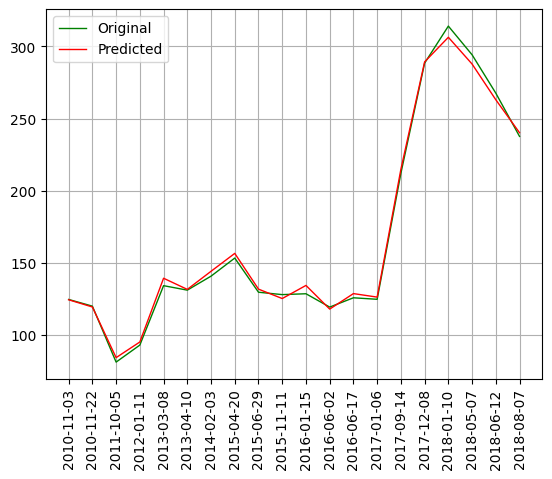

In [58]:
plt.plot(y_test_pred.index,y_test_pred['y_test'],color='g',linewidth=1,label='Original')
plt.plot(y_test_pred.index,y_test_pred['y_pred'],color='r',linewidth=1,label='Predicted')
plt.xticks(rotation=90)
plt.grid()
plt.legend()

# <center> THANK YOU </center>